In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import matplotlib as mpl
from sklearn.model_selection import train_test_split
mpl.rcParams.update({'font.size': 15})

In [2]:
DATA = pd.read_excel('PTResults-1000.xlsx') # big dataset

param = DATA.iloc[:,1:6].to_numpy() # features
data = DATA.iloc[:, 6:].to_numpy()  # labels

nRand = 100                   # number of shuffles
panels = DATA.iloc[4,6:].size # number of cells
nK = 6                        # number of NN algorithms tried (NN1, NN3, NN5, NN7, NN9, NN11)
                              # the script trains one model for each

rand_seed = np.random.randint(1, high=100000, size=nRand)

# variable to store the number of wrong predictions for each panel and each 
# NN algorithm (used to compute standard deviation)
str = np.empty([panels,nRand,nK])


# accumulation variable for error on each panel
errPanel = np.empty([panels,nK])
for i in range(panels):
    for j in range(nK):
        errPanel[i,j] = 0

# initialization of the classifiers
NN1  = KNeighborsClassifier(n_neighbors=7)
NN3  = KNeighborsClassifier(n_neighbors=9)
NN5  = KNeighborsClassifier(n_neighbors=11)
NN7  = KNeighborsClassifier(n_neighbors=13)
NN9  = KNeighborsClassifier(n_neighbors=15)
NN11 = KNeighborsClassifier(n_neighbors=17)

labels = ['NN7','NN9','NN11','NN13','NN15','NN17']

counter = 0   # counts data shuffles
for rs in rand_seed:

    counter = counter+1

    # split the data samples randomly between training and testing (85/15)
    np.random.seed(rs)
    train_data, test_data, train_param, test_param = train_test_split(data, param, test_size=0.15, random_state=rs, shuffle=True)
    nTest  = test_data[:,1].size     # number of testing samples
    nTrain  = train_data[:,1].size     # number of training samples

    
    print("Run #",counter)
    
    # variable storing predicted labels for each NN algorithm
    pred = np.empty([nK,nTest,panels])

    # training a single classifier for all cells

    NN1.fit(train_param,train_data)
    pred[0,:,:] = NN1.predict(test_param)

    NN3.fit(train_param,train_data)
    pred[1,:,:] = NN3.predict(test_param)

    NN5.fit(train_param,train_data)
    pred[2,:,:] = NN5.predict(test_param)

    NN7.fit(train_param,train_data)
    pred[3,:,:] = NN7.predict(test_param)

    NN9.fit(train_param,train_data)
    pred[4,:,:] = NN9.predict(test_param)

    NN11.fit(train_param,train_data)
    pred[5,:,:] = NN11.predict(test_param)

    for i in range(nK):
        for p in range(panels):
            # storing (normalized) number of wrong predictions 
            str[p,counter-1,i] = (abs(pred[i,:,p] - test_data[:,p]).sum()  / nTest)
            # accumulating errors in variable errPanel
            errPanel[p,i] = errPanel[p,i] + (abs(pred[i,:,p] - test_data[:,p]).sum()  / nTest)

print("\n\n")

# print total number of miss classifications for each algorithm
totalMissClass = np.empty([nK])
for i in range(nK):
    totalMissClass[i] = str[:,:,i].sum() / (counter*panels) * 100
    print(labels[i]+' missclassified ',"%.3f" % totalMissClass[i],'% of the samples')


std = np.empty([panels,nK]) # standard deviation
for i in range(panels):
    # computing error standard deviation at each panel
    for j in range(nK):
        std[i,j] = np.sqrt((1/counter)*((str[i,:,j]-errPanel[i,j]/counter)  * (str[i,:,j]-errPanel[i,j]/counter)).sum())

# error is plotted as %
errPanel = errPanel / counter * 100
std = std * 100

# reading header of xlsx file to get curvilinear cooridnates
CC = pd.read_excel('PTResults-1000.xlsx', header=None)
curv =  CC.iloc[0, 6:].to_numpy()
curv = np.array(curv,dtype=float) # matplotlib.pyplot.fill_between won't work w/o this line 

Run # 1
Run # 2
Run # 3
Run # 4
Run # 5
Run # 6
Run # 7
Run # 8
Run # 9
Run # 10
Run # 11
Run # 12
Run # 13
Run # 14
Run # 15
Run # 16
Run # 17
Run # 18
Run # 19
Run # 20
Run # 21
Run # 22
Run # 23
Run # 24
Run # 25
Run # 26
Run # 27
Run # 28
Run # 29
Run # 30
Run # 31
Run # 32
Run # 33
Run # 34
Run # 35
Run # 36
Run # 37
Run # 38
Run # 39
Run # 40
Run # 41
Run # 42
Run # 43
Run # 44
Run # 45
Run # 46
Run # 47
Run # 48
Run # 49
Run # 50
Run # 51
Run # 52
Run # 53
Run # 54
Run # 55
Run # 56
Run # 57
Run # 58
Run # 59
Run # 60
Run # 61
Run # 62
Run # 63
Run # 64
Run # 65
Run # 66
Run # 67
Run # 68
Run # 69
Run # 70
Run # 71
Run # 72
Run # 73
Run # 74
Run # 75
Run # 76
Run # 77
Run # 78
Run # 79
Run # 80
Run # 81
Run # 82
Run # 83
Run # 84
Run # 85
Run # 86
Run # 87
Run # 88
Run # 89
Run # 90
Run # 91
Run # 92
Run # 93
Run # 94
Run # 95
Run # 96
Run # 97
Run # 98
Run # 99
Run # 100



NN7 missclassified  5.465 % of the samples
NN9 missclassified  5.354 % of the samples
NN11 missclassified

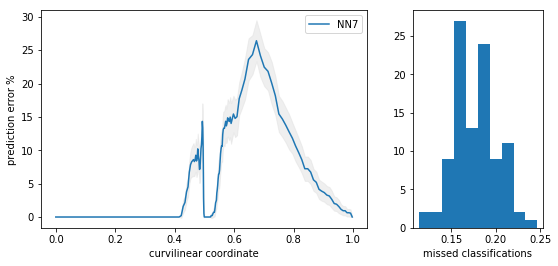

percentage of miss classifications at s = 0.61:  17.733333333333334
standard deviation:  2.4747614924360786




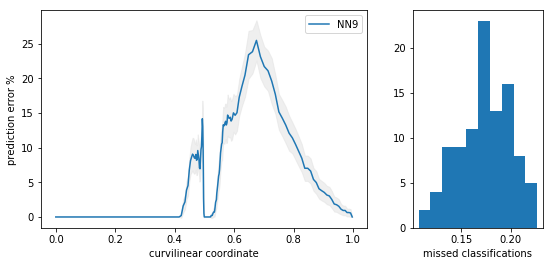

percentage of miss classifications at s = 0.61:  17.27999999999999
standard deviation:  2.6644657584172062




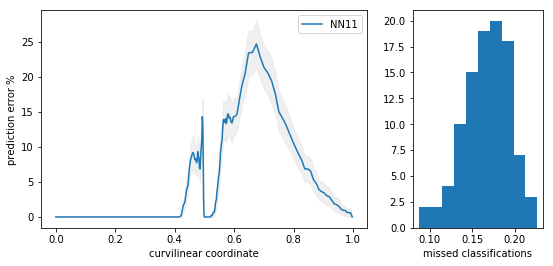

percentage of miss classifications at s = 0.61:  16.62
standard deviation:  2.6081155393629833




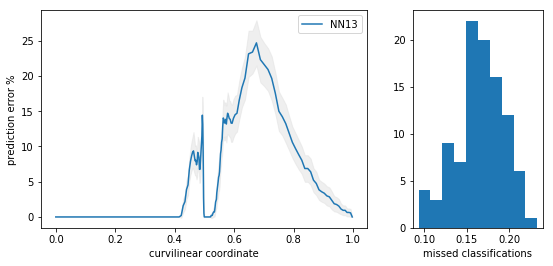

percentage of miss classifications at s = 0.61:  16.546666666666667
standard deviation:  2.7444975253526223




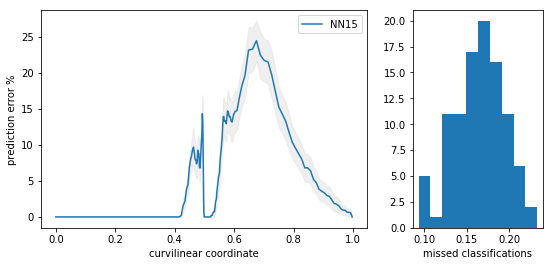

percentage of miss classifications at s = 0.61:  16.46666666666667
standard deviation:  2.695675549220764




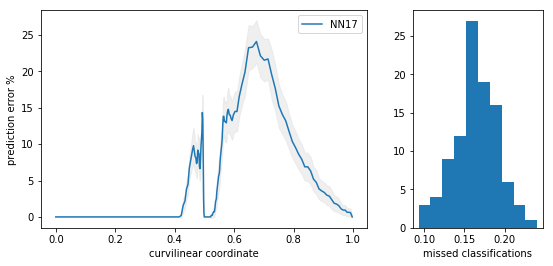

percentage of miss classifications at s = 0.61:  16.53333333333334
standard deviation:  2.735771270491092




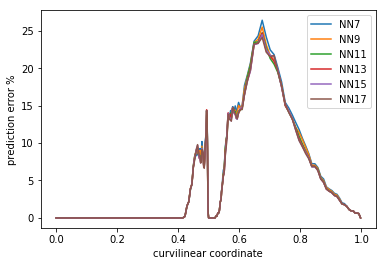

In [3]:
# plotting one figure for each NN algorithm
# x axis curvilinear coordinates
# y axis percentage of missed predictions averaged on all shuffles. Shaded area is standard deviation
# figure on the right shows histogramm at s = 0.6170...
target = 136 # s = 0.6170...

cs     = ['r','b','y','g','k','c']

for i in range(nK):

    fig, axes = plt.subplots(1,2,gridspec_kw={'width_ratios': [5, 2]},figsize=(9,4))
    axes[0].plot(curv,errPanel[:,i],label=labels[i])  # error
    axes[0].fill_between(curv, errPanel[:,i]-std[:,i], errPanel[:,i]+std[:,i],  # fills area according to standard deviation
        alpha=0.5,color='#e0e0e0')
    axes[0].legend(loc='upper right')
    axes[0].set_xlabel('curvilinear coordinate')
    axes[0].set_ylabel('prediction error %')
    axes[1].hist(str[target,:,i], bins=10)
    axes[1].set_xlabel('missed classifications')
#     plt.savefig('plots_nD/'+labels[i]+'.eps', format='eps')
    plt.show()
    print('percentage of miss classifications at s = 0.61: ',"%.3f" % errPanel[target,i])
    print('standard deviation: ',"%.3f" % std[target,i])
    print('\n')


# plots single figure comparing all NN algo
plt.figure()
for i in range(nK):
    plt.plot(curv,errPanel[:,i],label=labels[i])

plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')
# plt.savefig('plots_nD/NN_comp.eps', format='eps')
plt.show()